In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

In [4]:
#Step1

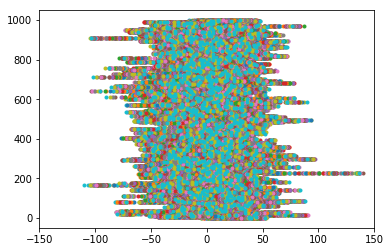

In [85]:
particle = np.zeros(1000)
step = range(1000)

for i in step:
    for j in range(len(particle)):        
        r = np.random.rand()
        if r > 0.5:
            particle[j] += 1
        else:
            particle[j] -= 1
    if i%5 == 0:
        plt.plot(particle, range(1000), ".")
        plt.xlim(-150,150)
        #display.display(plt.gcf())
        #display.clear_output(wait=True)
        #plt.cla()
        #time.sleep(0.001)



In [ ]:
#Step2

In [10]:
particle = np.zeros(1000)
step = range(1000)
mean = np.zeros(len(step))
std_deviation = np.zeros(len(step))

for i in range(0, 1000):
    for j in range(1000):        
        r = np.random.rand()
        if r > 0.5:
            particle[j] += 1
        else:
            particle[j] -= 1
    mean[i] = np.mean(particle)
    std_deviation[i] = np.std(particle)


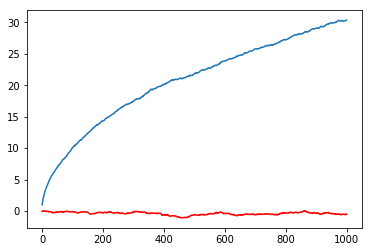

In [11]:
plt.plot(step, std_deviation)
plt.plot(step, mean, "r")

In [32]:
std_log = np.log(std_deviation)
std_square = np.square(std_deviation)
std_sqrt = np.sqrt(std_deviation)

In [64]:
def cal_reg_output(X, Y):
    m, b = np.polyfit(X, Y, 1)
    return m*X + b

def draw_ori_reg_grapghs(X, Y, R):
    plt.plot(X, Y, 'r')
    plt.plot(X, R, 'k')
    
def cal_correlation(X, Y):
    return (len(X)*sum(X*Y) - sum(X)*sum(Y))/sqrt(len(X)*sum(X*X) - sum(X)*sum(X))/sqrt(len(X)*sum(Y*Y)-sum(Y)*sum(Y))

0.9732885002309978


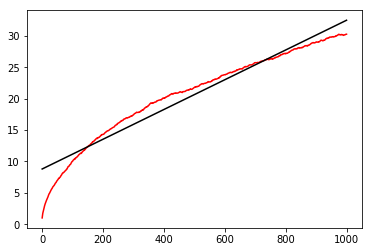

In [276]:
ori_reg_out = cal_reg_output(step, std_deviation)
draw_ori_reg_grapghs(step, std_deviation, ori_reg_out)
ori_cc = cal_correlation(std_deviation, ori_reg_out)
print(ori_cc)

0.8597304510265065


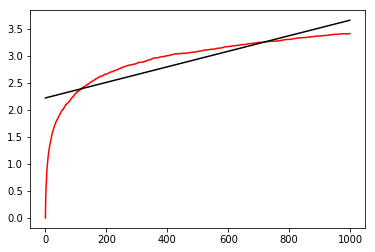

In [65]:
log_reg_out = cal_reg_output(step, std_log)
draw_ori_reg_grapghs(step, std_log, log_reg_out)
log_cc = cal_correlation(std_log, log_reg_out)
print(log_cc)

0.9992211253208385


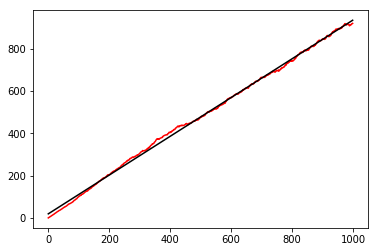

In [66]:
squre_reg_out = cal_reg_output(step, std_square)
draw_ori_reg_grapghs(step, std_square, squre_reg_out)
squre_cc = cal_correlation(std_square, squre_reg_out)
print(squre_cc)

0.9335034425933636


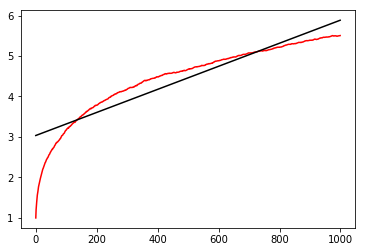

In [68]:
sqrt_reg_out = cal_reg_output(step, std_sqrt)
draw_ori_reg_grapghs(step, std_sqrt, sqrt_reg_out)
sqrt_cc = cal_correlation(std_sqrt, sqrt_reg_out)
print(sqrt_cc)

In [70]:
def predict(X):
    m, b = np.polyfit(step, std_square, 1)
    return sqrt(m*X + b)

In [79]:
#Step3

In [254]:
particle_number = 1000
step_number = 1000
block_number = 40
reachable_space = np.linspace(-500, 500, block_number + 1)
#histogram = np.zeros((step_number, block_number))

In [255]:
def fill_histogram(iteration, particle, histogram, ranges):
    for i in range(len(ranges) - 1):
        histogram[iteration, i] += np.logical_and((ranges[i] <= particle), (ranges[i+1] > particle)).sum()

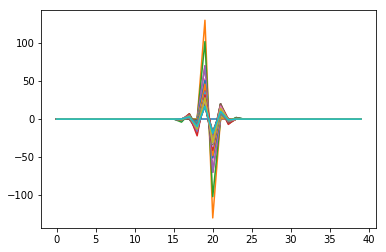

In [298]:
hist = []
particle = np.zeros(particle_number)
step = range(step_number)

for i in step:
    for j in range(particle_number):        
        r = np.random.rand()
        if r > 0.5:
            particle[j] += 1
        else:
            particle[j] -= 1
    hist.append(np.histogram(particle, bins = reachable_space)[0])
    if i%10 == 0:
        dif = hist[i] - hist[i-1]
        #plt.xticks(reachable_space)
        plt.plot(dif)

In [292]:
print(hist[0] - hist[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  253 -253    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [258]:
print(len(hist[:,0]))

1000
